Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

Loading Dataset

In [2]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")


EDA

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
#count,mean,sd, min, max
# the above gives the statistic of numerical variables
print(train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [6]:
# Dropping Loan_ID column
train.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
train.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [8]:
# Categorical only
train.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [9]:
#Check for duplication
# Select duplicate rows
print(train[train.duplicated()])

print(len(train[train.duplicated()]))

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
0


In [10]:
# Check for null values
print(train.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# Check for null values
print(train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [12]:
# no of unique values in each column
train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

<Axes: xlabel='Dependents', ylabel='count'>

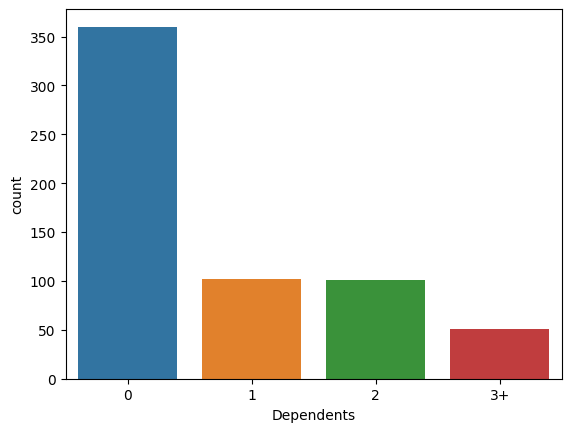

In [14]:
from sqlalchemy.sql.functions import count
# Univariate Analysis
#Categorical var: Count plot, bar plot, pie chart...
#Numerical var: Histogram, Box plot, density plot...

## Countplot //sns

sns.countplot(data=train, x='Dependents')

<Axes: >

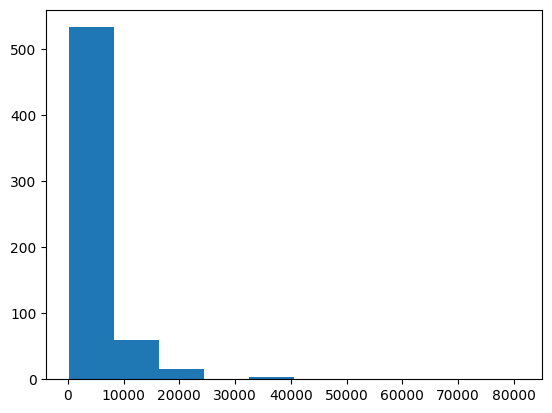

In [15]:
train['ApplicantIncome'].hist(grid=False)

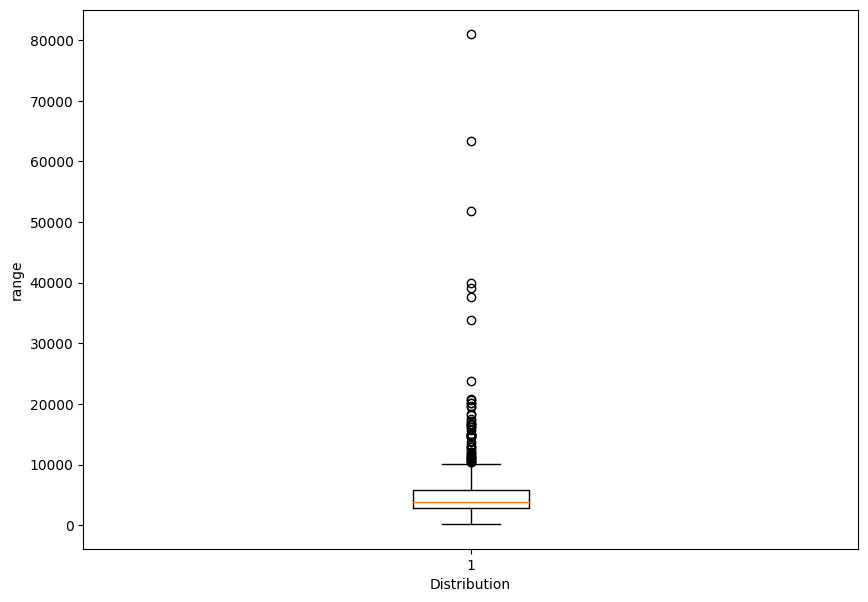

In [16]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(train['ApplicantIncome'])
plt.xlabel("Distribution")
plt.ylabel("range")
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

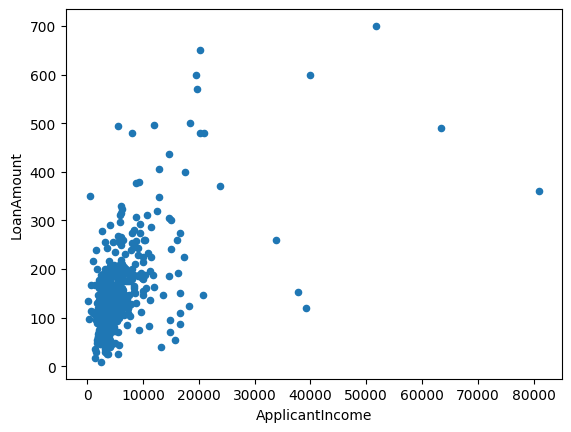

In [17]:
# Numerical: Pair, Scatter
# Categorical: Stacked bar

# Scatter plot
train.plot.scatter(x='ApplicantIncome',y='LoanAmount')

<ipython-input-18-3623106096a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True, vmin=-1, vmax=1)


<Axes: >

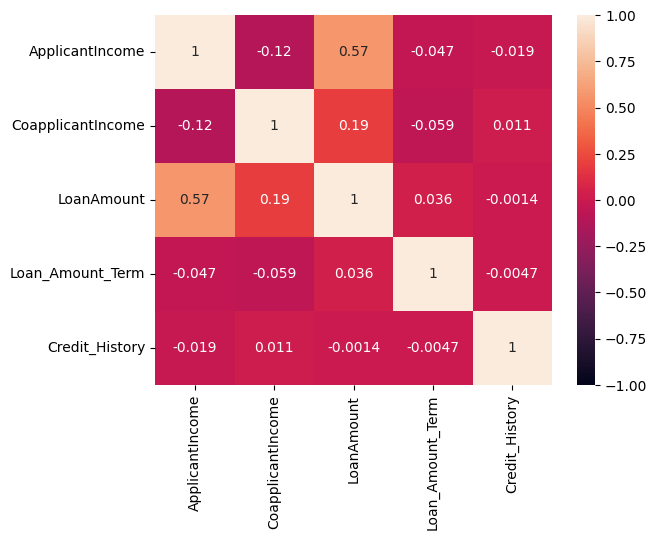

In [18]:
sns.heatmap(train.corr(),annot=True, vmin=-1, vmax=1)

<Axes: >

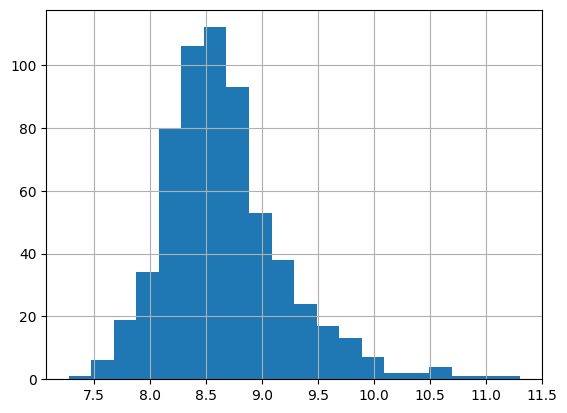

In [19]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
train['TotalIncome_log']=np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20)

In [20]:
train.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323


In [26]:
x=train.iloc[:,0:11].values
y=train.iloc[:,11].values
x.shape,y.shape
print(x)
print(y)

[['Male' 'No' '0' ... 360.0 1.0 'Urban']
 ['Male' 'Yes' '1' ... 360.0 1.0 'Rural']
 ['Male' 'Yes' '0' ... 360.0 1.0 'Urban']
 ...
 ['Male' 'Yes' '1' ... 360.0 1.0 'Urban']
 ['Male' 'Yes' '2' ... 360.0 1.0 'Urban']
 ['Female' 'No' '0' ... 360.0 0.0 'Semiurban']]
['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N'

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

**Label Encoding**


In [29]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()

In [30]:
for i in range(0, 5):
    x_train[:,i] = le_x.fit_transform(x_train[:,i])

x_train[:,10] = le_x.fit_transform(x_train[:,10])

In [31]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [32]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_X = LabelEncoder()
for i in range(0, 5):
    x_test[:,i] = le_x.fit_transform(x_test[:,i])
x_test[:,10] = le_x.fit_transform(x_test[:,10])
# Encoding the Dependent Variable
le_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

**Classification Techniques**


1.   **Decision Tree Classification**




In [127]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [128]:
# Predicting the Test set results
y_pred = DTC.predict(x_test)
print(y_pred)

[1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0]


In [129]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decission Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decission Tree Classifier is:  0.6829268292682927


**2.KNN**




In [113]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [114]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1]


In [115]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.5772357723577236


3.  **Random Forest Classifier**




In [104]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)


RandomForestClassifier()

In [105]:
# Predicting the Test set results
y_pred = RFC.predict(x_test)
print(y_pred)

[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1]


In [106]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of RFC is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of RFC is:  0.7804878048780488


4.  **Support Vector Classifier**




In [91]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(x_train, y_train)

SVC()

In [92]:
# Predicting the Test set results
y_pred = SVC.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [93]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of SVC is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVC is:  0.6747967479674797


**Dataset: Test**

EDA

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [43]:
#count,mean,sd, min, max
# the above gives the statistic of numerical variables
print(test.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [44]:
#count,mean,sd, min, max
# the above gives the statistic of numerical variables
print(test.describe(include='O'))

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        367    356     367        357       367           344   
unique       367      2       2          4         2             2   
top     LP001015   Male     Yes          0  Graduate            No   
freq           1    286     233        200       283           307   

       Property_Area  
count            367  
unique             3  
top            Urban  
freq             140  


In [45]:
#Check for duplication
# Select duplicate rows
print(test[test.duplicated()])

print(len(test[test.duplicated()]))

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
0


In [61]:
# Check for null values
print(test.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [62]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

# Check for null values
print(train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
dtype: int64


In [47]:
# no of unique values in each column
test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [63]:
test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

<Axes: xlabel='Dependents', ylabel='count'>

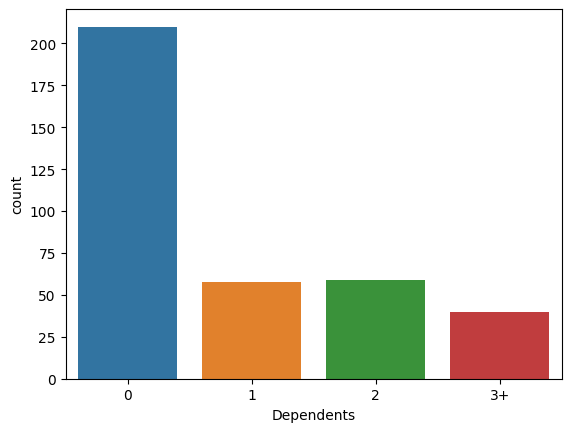

In [64]:
from sqlalchemy.sql.functions import count
# Univariate Analysis
#Categorical var: Count plot, bar plot, pie chart...
#Numerical var: Histogram, Box plot, density plot...

## Countplot //sns

sns.countplot(data=test, x='Dependents')

<Axes: >

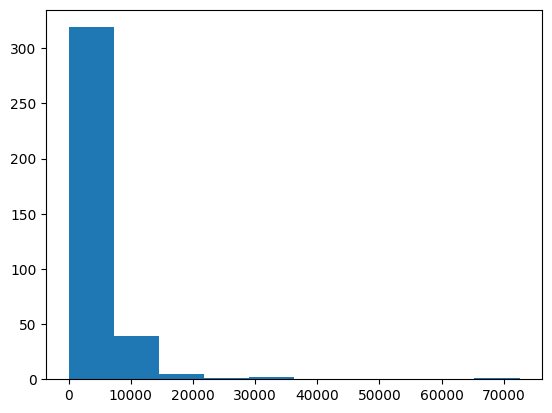

In [65]:
test['ApplicantIncome'].hist(grid=False)

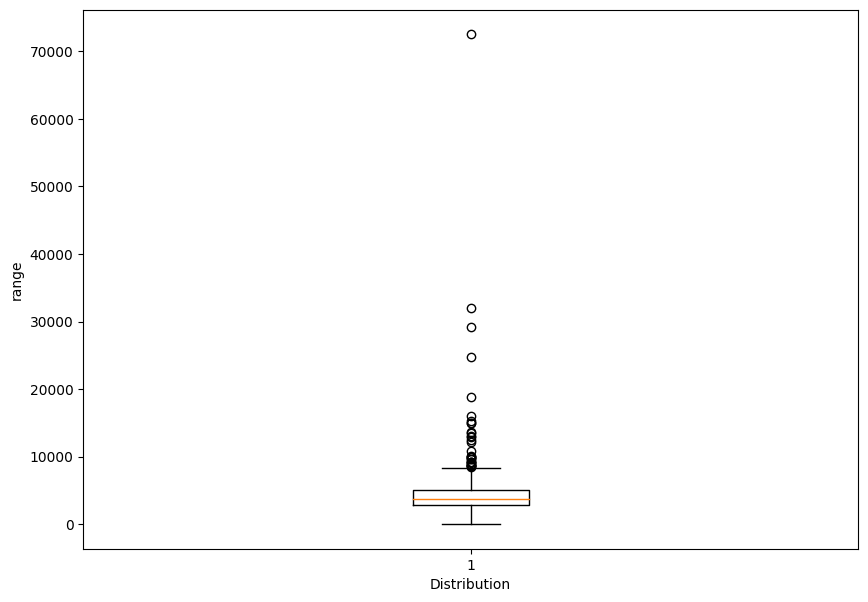

In [66]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(test['ApplicantIncome'])
plt.xlabel("Distribution")
plt.ylabel("range")
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

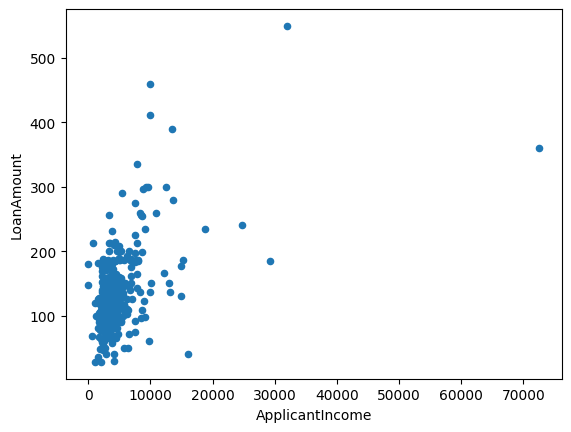

In [67]:
# Numerical: Pair, Scatter
# Categorical: Stacked bar

# Scatter plot
test.plot.scatter(x='ApplicantIncome',y='LoanAmount')

<ipython-input-68-e982c3fae96f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(),annot=True, vmin=-1, vmax=1)


<Axes: >

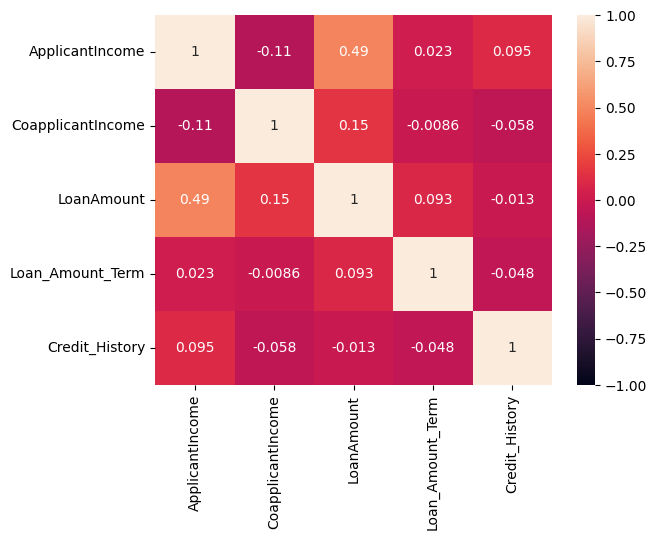

In [68]:
sns.heatmap(test.corr(),annot=True, vmin=-1, vmax=1)

In [69]:
x_new=test.iloc[:,1:12].values

In [70]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_x = LabelEncoder()
for i in range(0, 5):
    x_new[:,i] = le_x.fit_transform(x_new[:,i])
x_new[:,10] = le_x.fit_transform(x_new[:,10])

**Loan Approval Prediction on Test data**

1.   **Decision Tree Classification**




In [133]:
# Predicting the Test set results
y_pred_new = DTC.predict(x_new)
print(y_pred_new)

[1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]


2.   **KNN**




In [132]:
# Predicting the Test set results
y_pred_new =classifier.predict(x_new)
print(y_pred_new)

[1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]


3. **RFC**




In [130]:
# Predicting the Test set results
y_pred_new =RFC.predict(x_new)
print(y_pred_new)

[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


4. **SVC**




In [131]:
# Predicting the Test set results
y_pred_new =SVC.predict(x_new)
print(y_pred_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
